In [3]:
# Dependencies
import pandas as pd
import numpy as np

In [4]:
# Load data (FRED-MD)
df = pd.read_csv(
    '/home/js/macroeconvue/nowcasting/current.csv',
    index_col='sasdate'
    )
# Drop target variable (CPIAUCSL)
target = df['CPIAUCSL'].copy()

In [5]:
# Make the series stationary
def transform_series(series, code):
    if code == 1:
        return series  # No transformation
    elif code == 2:
        return series.diff().dropna()  # First difference
    elif code == 3:
        return series.diff().diff().dropna()  # Second difference
    elif code == 4:
        return np.log(series).dropna()  # Logarithm
    elif code == 5:
        return np.log(series).diff().dropna()  # First difference of logarithm
    elif code == 6:
        return np.log(series).diff().diff().dropna()  # Second difference of logarithm
    elif code == 7:
        return series.pct_change().dropna()  # Percentage change
    else:
        raise ValueError(f"Unknown transformation code: {code}")

transformed_data = {}
transformation_codes = df.iloc[0]  # Assuming the first row contains the codes
data = df.iloc[1:]  # The actual data starts from the second row

for column in data.columns:
    code = transformation_codes[column]
    transformed_data[column] = transform_series(data[column], code)

df = pd.DataFrame(transformed_data).dropna(how='all')  # Drop rows with all NaN values

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
df = (df - df.mean()) / df.std()
# Drop rows with NaN values after transformation
df = df.dropna()


In [7]:
# Apply PCA fto look for the number of components to retain
from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# pca = PCA()
# pca.fit(df)

# cumulative_variance = pca.explained_variance_ratio_.cumsum()

# # Plot cumulative explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(cumulative_variance, marker='o', linestyle='--')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by Number of Components')
# plt.grid(True)
# plt.show()


In [8]:
# Apply PCA to keep 90% of variance
pca = PCA(n_components=0.90)
pca.fit(df)
data = pca.transform(df)
print(f"PCA len: {len(data)}, Original: {len(df)}")

# Look at relationship between original features nad cleanred_df
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, index=df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[0])])
display(loadings_df)

PCA len: 390, Original: 390


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
RPI,0.011091,0.088958,-0.065066,-0.095142,0.017546,-0.270161,-0.292194,0.396829,-0.137551,-0.178104,...,0.070459,-0.071711,-0.005166,-0.003867,-0.051602,0.004891,0.074991,0.054409,0.021927,0.048947
W875RX1,0.010510,0.125491,-0.069130,-0.051006,-0.079709,-0.110538,-0.033649,0.129135,-0.017065,0.037165,...,0.157663,0.304651,-0.047399,0.351185,-0.098132,0.182017,-0.023546,-0.074313,-0.105872,-0.142530
DPCERA3M086SBEA,0.096898,0.097653,-0.099278,0.044788,0.024284,0.011187,-0.070683,0.052649,-0.047191,0.000697,...,-0.035982,-0.100862,-0.034420,-0.024567,-0.045596,-0.108949,-0.004836,-0.150160,-0.009659,-0.092909
CMRMTSPLx,0.069610,0.098815,-0.099400,0.035829,0.004873,-0.037653,-0.002262,0.028013,-0.041424,-0.023038,...,-0.013942,-0.082327,-0.010826,-0.014138,-0.009452,-0.101708,0.090792,-0.039042,-0.080009,0.004295
RETAILx,0.122939,0.069485,-0.082461,0.007783,0.014641,0.000300,-0.103714,0.100721,-0.050366,-0.019155,...,-0.087359,-0.087931,-0.050165,-0.028237,-0.079838,-0.085979,0.064137,-0.175009,-0.059118,-0.105511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UMCSENTx,0.025212,0.017140,-0.045532,0.031594,-0.062823,0.111543,-0.150790,0.090314,0.023732,0.098380,...,0.075400,0.363172,-0.027545,-0.286315,0.412625,-0.314178,0.143187,0.113252,0.067784,0.143869
DTCOLNVHFNM,0.016206,0.000168,-0.017409,0.072548,0.201196,0.240849,0.152020,0.341585,0.010394,-0.079698,...,-0.148960,0.066996,-0.017193,0.030049,0.113224,0.030298,-0.215839,-0.201725,-0.062900,0.397133
DTCTHFNM,0.018161,-0.003976,-0.008117,0.018190,0.265010,0.260172,0.245477,0.449780,0.116126,-0.030136,...,0.067876,-0.040331,0.031527,0.001350,-0.065267,0.024543,0.087885,0.091822,0.079620,-0.099343
INVEST,0.016548,-0.015147,0.003901,-0.007913,0.010882,-0.178948,0.025532,-0.032262,0.015052,0.132492,...,0.216199,-0.141711,-0.079258,0.125530,-0.196866,-0.227971,-0.224012,-0.207482,0.075341,0.002463


In [9]:
# Prepare data for the LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Convert data into sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 12  # Choose based on your data
X, y = create_sequences(data, target.values, time_steps)

# # Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(f"Data shape: {data.shape}")
print(f"Target shape: {target.shape}")


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Epoch 1/50


/home/js/macroeconvue/nowcasting/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 3340.9031 - val_loss: 13747.3936
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3025.0691 - val_loss: 8882.9141
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1790.2228 - val_loss: 7489.3267
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 957.6842 - val_loss: 5309.4858
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 537.9810 - val_loss: 4019.6682
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 441.2828 - val_loss: 5124.9946
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 362.2273 - val_loss: 5535.3530
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 269.6422 - val_loss: 4597.4380
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 233.2858 - val_loss: 4532.8662
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 151.5524 - val_loss: 4519.8062
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 136.4311 - val_loss: 4319.7427
Epoch 12/50
10/

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
print(test_predict.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(76, 1)


 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Train MSE: 22.408937083210805
Test MSE: 4112.3311795433565


ValueError: x and y must have same first dimension, but have shapes (491,) and (76, 1)

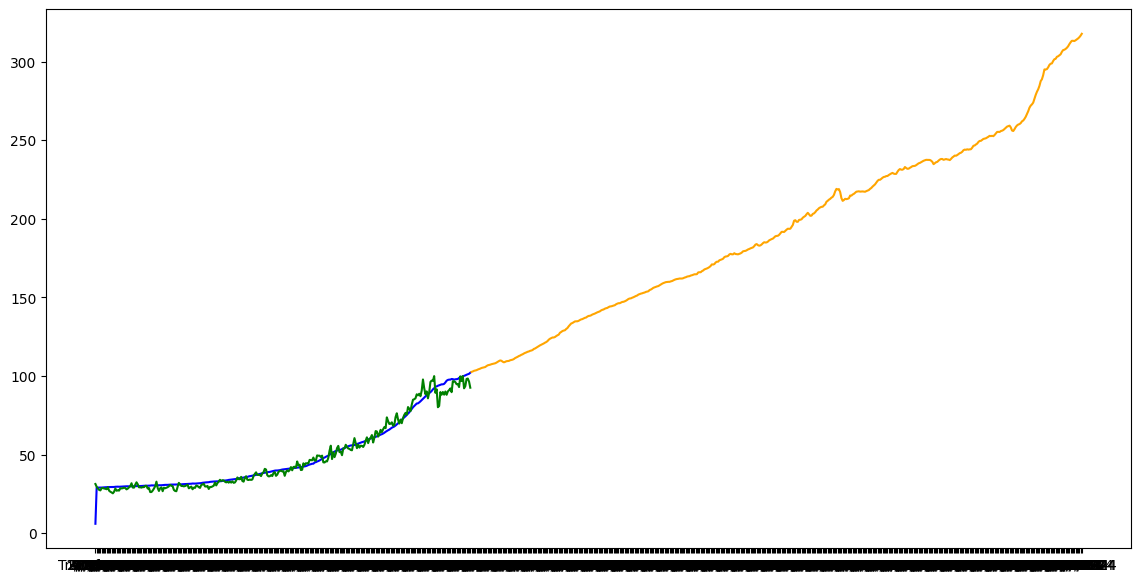

In [ ]:
# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Evaluate performance
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
# Inverse transform to get actual values
# train_predict = target.iloc[:split].values + train_predict.flatten()
# test_predict = target.iloc[split:].values + test_predict.flatten()
# # Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7)) 
plt.plot(target.index[:split], target.iloc[:split], label='Train Actual', color='blue')
plt.plot(target.index[split:], target.iloc[split:], label='Test Actual', color='orange')
plt.plot(target.index[:split], train_predict, label='Train Predicted', color='green')
plt.plot(target.index[split:], test_predict, label='Test Predicted', color='red')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('CPIAUCSL')
plt.legend()
plt.show()

In [ ]:
# Get RMSE for the test set
from sklearn.metrics import mean_squared_error
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"Test RMSE: {test_rmse}")


Test RMSE: 67.71338701840625
